In [2]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from scipy.integrate import odeint, solve_ivp
from scipy.optimize import minimize
from scipy.stats import linregress, spearmanr, norm

from gLV_fit_lambda import *

import warnings

In [3]:
warnings.filterwarnings('ignore')

# INULINA

## Start by importing full dataset

In [4]:
dataset_inulin = "Inulin"
df_inulin = pd.read_csv(f"Data_Params/{dataset_inulin}_full_passage.csv")
print(df_inulin.shape)
df_inulin.head()

(473, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC_passage1.0,0.0,0.002365,0.000840,0.000829,0.001313,0.000970,0.000679,0.000812,0.000646,0.001287,0.000257
1,COMM10<AC_passage1.0,24.0,0.011591,0.553315,0.075293,0.325136,0.060694,0.790717,0.021521,0.014780,0.015808,0.055311
2,COMM10<AC_passage2.0,0.0,0.000580,0.027666,0.003765,0.016257,0.003035,0.039536,0.001076,0.000739,0.000790,0.002766
3,COMM10<AC_passage2.0,24.0,0.002481,0.096672,0.139392,0.636775,0.032067,0.770841,0.122771,0.001803,0.004748,0.120618
4,COMM10<AC_passage3.0,0.0,0.000124,0.004834,0.006970,0.031839,0.001603,0.038542,0.006139,0.000090,0.000237,0.006031


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [5]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1


Model has 110 parameters


## Run optimization to find regularized parameters

In [6]:
# instantiate gLV fit 
gLV_model_inulin = ODE(df_inulin, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_inulin.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|██████████| 115/115 [00:02<00:00, 46.78it/s]


Iteration: 0, Loss: 8.955e+02, Convergence rate: inf
Iteration: 1, Loss: 8.828e+02, Convergence rate: 1.420e-02
Iteration: 2, Loss: 8.702e+02, Convergence rate: 1.421e-02
Iteration: 3, Loss: 8.579e+02, Convergence rate: 1.420e-02
Iteration: 4, Loss: 8.457e+02, Convergence rate: 1.420e-02
Iteration: 5, Loss: 8.337e+02, Convergence rate: 1.417e-02
Iteration: 6, Loss: 8.219e+02, Convergence rate: 1.417e-02
Iteration: 7, Loss: 8.103e+02, Convergence rate: 1.414e-02
Iteration: 8, Loss: 7.988e+02, Convergence rate: 1.411e-02
Iteration: 9, Loss: 7.876e+02, Convergence rate: 1.409e-02
Iteration: 10, Loss: 7.765e+02, Convergence rate: 1.405e-02
Iteration: 11, Loss: 7.656e+02, Convergence rate: 1.402e-02
Iteration: 12, Loss: 7.549e+02, Convergence rate: 1.398e-02
Iteration: 13, Loss: 7.444e+02, Convergence rate: 1.394e-02
Iteration: 14, Loss: 7.341e+02, Convergence rate: 1.390e-02
Iteration: 15, Loss: 7.239e+02, Convergence rate: 1.385e-02
Iteration: 16, Loss: 7.139e+02, Convergence rate: 1.381e

100%|██████████| 115/115 [00:03<00:00, 29.45it/s]


Total samples: 1791, Updated regularization: 1.16e-01
Iteration: 0, Loss: 7.666e+02, Convergence rate: inf
Iteration: 1, Loss: 7.631e+02, Convergence rate: 4.562e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 7.564e+02, Convergence rate: 8.796e-03
Step size set to 4.000e-02
Evidence 33446.086
Updating precision...


100%|██████████| 115/115 [00:05<00:00, 22.45it/s]


Total samples: 1791, Updated regularization: 1.79e-01
Iteration: 0, Loss: 8.817e+02, Convergence rate: inf
Iteration: 1, Loss: 8.781e+02, Convergence rate: 4.142e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 8.710e+02, Convergence rate: 8.013e-03
Step size set to 4.000e-02
Evidence 34582.780
Updating precision...


100%|██████████| 115/115 [00:06<00:00, 17.74it/s]


Total samples: 1791, Updated regularization: 1.89e-01
Iteration: 0, Loss: 8.935e+02, Convergence rate: inf
Iteration: 1, Loss: 8.900e+02, Convergence rate: 3.948e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 8.832e+02, Convergence rate: 7.665e-03
Step size set to 4.000e-02
Evidence 34778.671


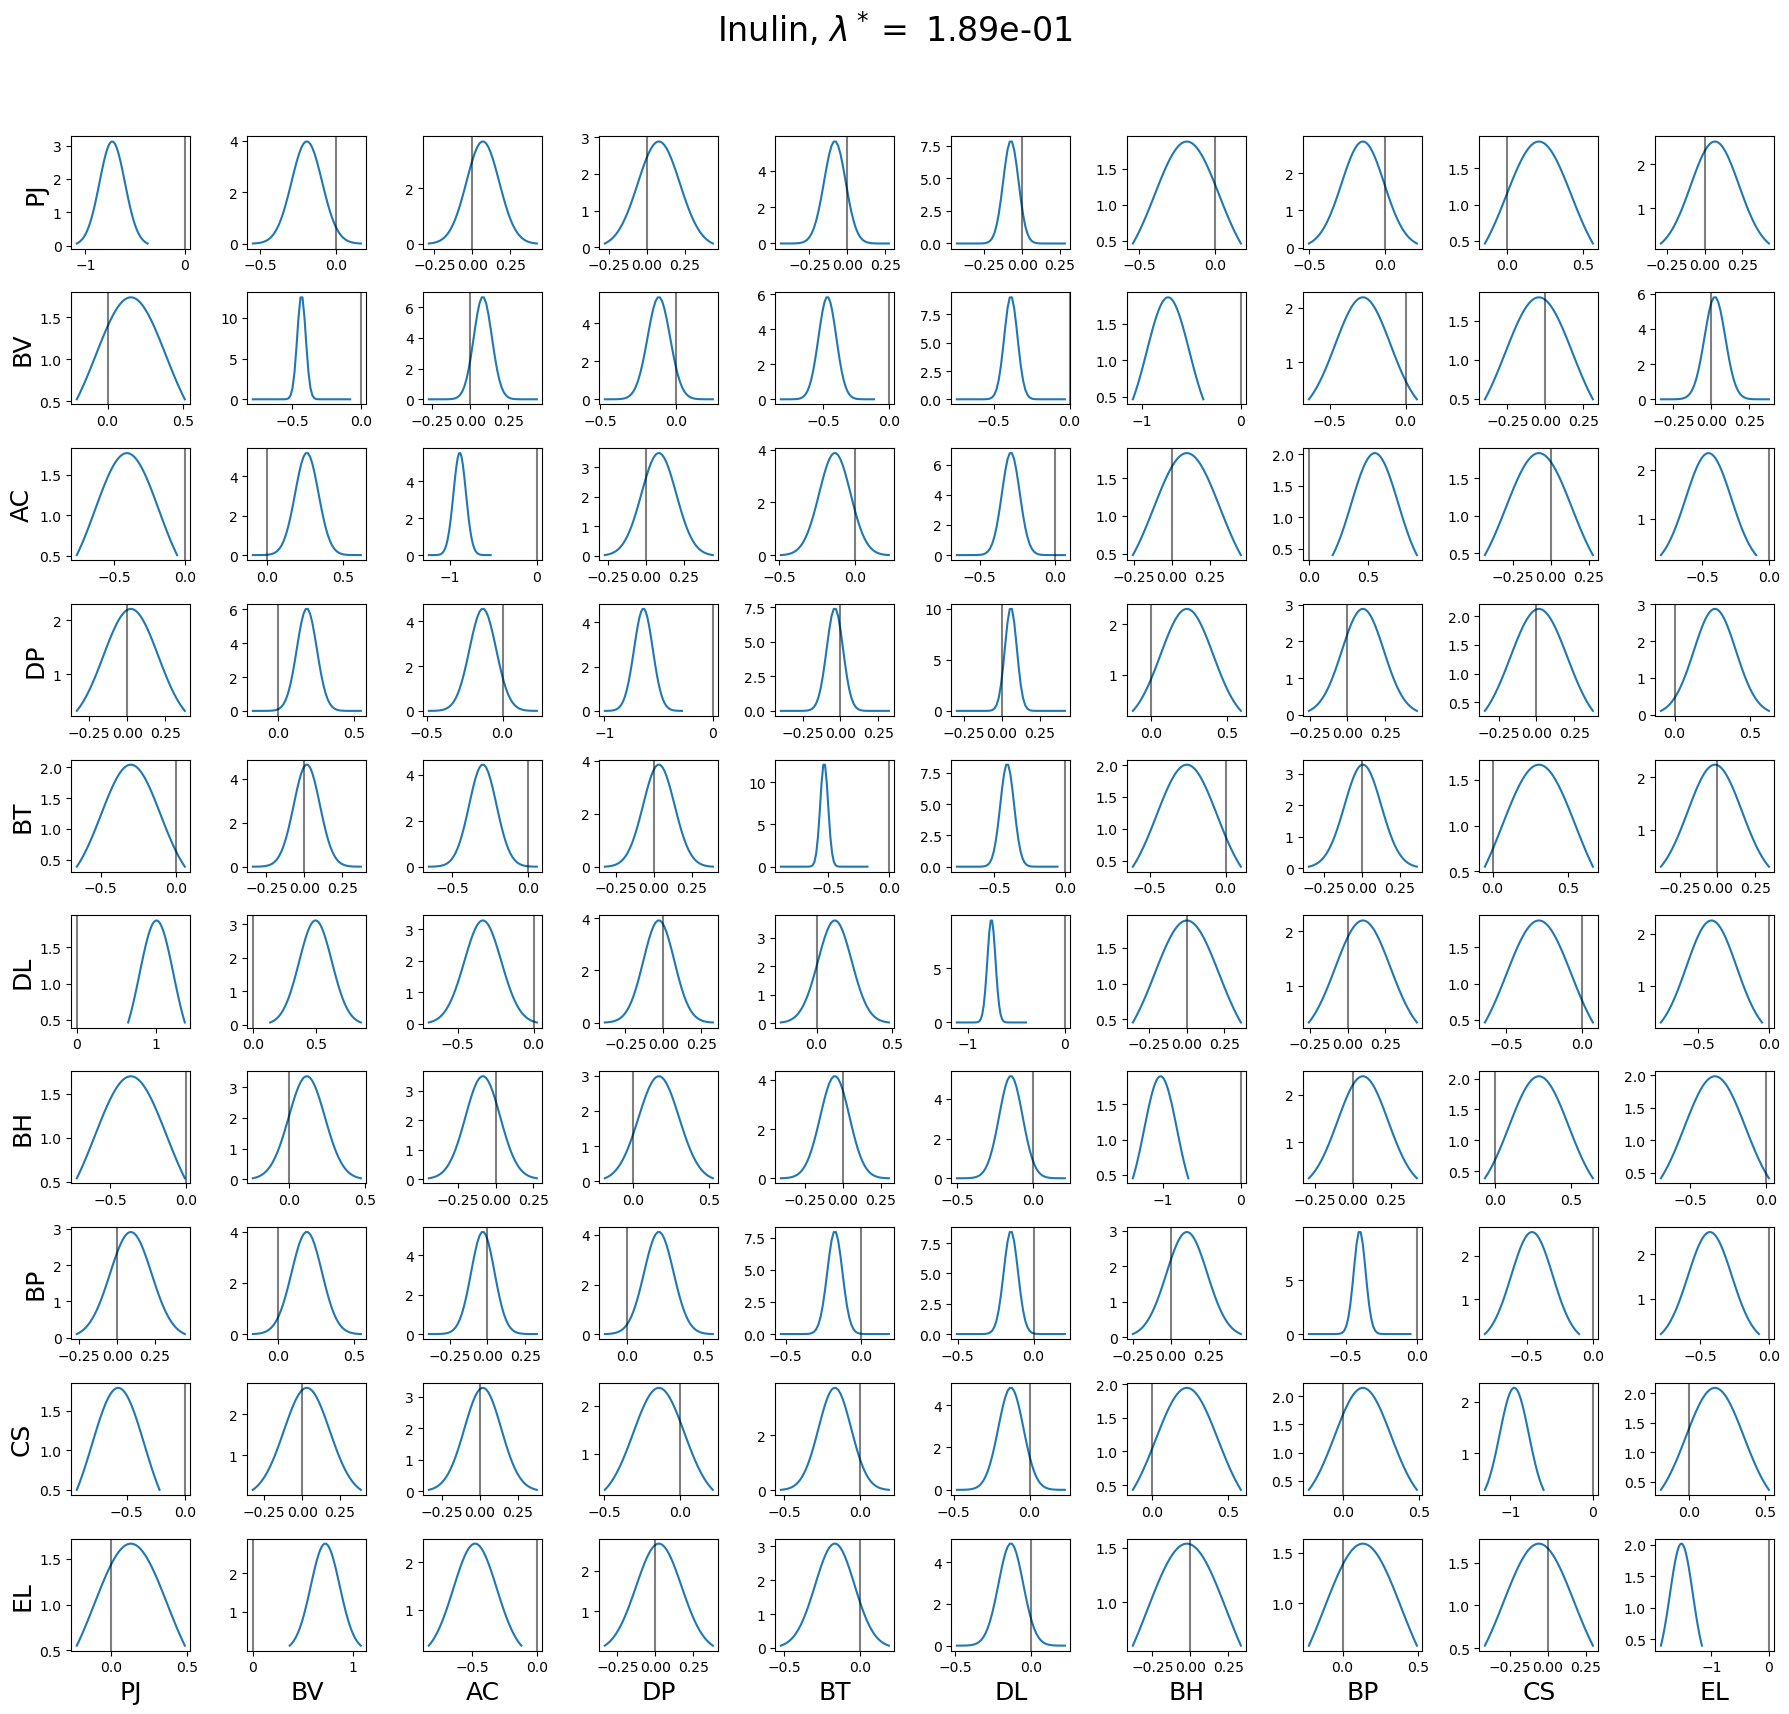

In [15]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']


Avec_inulin = gLV_model_inulin.params[gLV_model_inulin.n_species:]
Aij_std_inulin = np.sqrt(np.diag(gLV_model_inulin.Ainv))[gLV_model_inulin.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_inulin.n_species):
    for j in range(gLV_model_inulin.n_species):
        plt.subplot(gLV_model_inulin.n_species, gLV_model_inulin.n_species, k+1)
        a = np.linspace(Avec_inulin[k]-np.std(Avec_inulin), Avec_inulin[k]+np.std(Avec_inulin))
        plt.plot(a, norm.pdf(a,Avec_inulin[k],Aij_std_inulin[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_inulin.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_inulin.replace("_"," "), gLV_model_inulin.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [16]:
print(f"# of parameters estimated: {len(gLV_model_inulin.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_inulin.params))))

log_eigs_inulin = np.log(np.linalg.eigvalsh(gLV_model_inulin.A))
U_inulin = np.sum(log_eigs_inulin)
print("Parameter precision: {:.3f}".format(U_inulin))

# Compute Wald test for each parameter
std_errors_inulin = np.sqrt(np.diag(gLV_model_inulin.Ainv))
walds_inulin = gLV_model_inulin.params/std_errors_inulin
wald_p_vals_inulin = 2*norm.cdf(-np.abs(walds_inulin))
print(sum(wald_p_vals_inulin<.05)/len(wald_p_vals_inulin))

# of parameters estimated: 110
Maximum absolute parameter value: 1.519
Parameter precision: 541.987
0.38181818181818183


In [17]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Inulin = pd.DataFrame()
df_Inulin["Param name"] = param_names
df_Inulin["Param value"] = gLV_model_inulin.params
df_Inulin["Param stdv"]  = np.sqrt(np.diag(gLV_model_inulin.Ainv))
df_Inulin["Param p-value"] = wald_p_vals_inulin
for j, param_name in enumerate(param_names):
    df_Inulin[param_name]  = gLV_model_inulin.Ainv[:, j]
#df_Inulin.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Inulin

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.253887,0.033606,4.195955e-14,0.001129,-0.000019,0.000044,-7.180803e-06,0.000021,-7.164291e-05,...,-0.000235,-0.000002,-0.000053,-0.000026,-0.000024,0.000075,-0.000056,1.920700e-06,-0.000005,-0.000021
1,BV,0.482203,0.021134,3.173361e-115,-0.000019,0.000447,-0.000019,-8.504356e-06,0.000053,-2.200362e-05,...,0.000034,-0.000127,-0.000025,0.000075,-0.000007,-0.000055,0.000039,8.281403e-06,0.000006,0.000216
2,AC,0.437547,0.027526,6.807134e-57,0.000044,-0.000019,0.000758,4.260726e-06,0.000068,1.525719e-04,...,0.000036,0.000116,-0.000217,0.000114,-0.000060,-0.000013,-0.000067,-1.116965e-05,-0.000014,-0.000296
3,DP,0.190892,0.019602,2.068288e-22,-0.000007,-0.000009,0.000004,3.842412e-04,0.000006,-1.897995e-06,...,0.000014,-0.000013,0.000058,0.000034,0.000030,0.000051,0.000019,-7.284772e-07,-0.000008,0.000064
4,BT,0.466031,0.022661,5.634292e-94,0.000021,0.000053,0.000068,5.999695e-06,0.000514,2.962060e-05,...,0.000017,0.000057,-0.000033,-0.000012,0.000099,0.000011,-0.000016,1.093205e-06,-0.000005,-0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,-0.131300,0.081203,1.058931e-01,0.000075,-0.000055,-0.000013,5.128050e-05,0.000011,-1.092813e-04,...,-0.000579,-0.003378,-0.001630,-0.005628,-0.000412,0.006594,0.000747,-1.069351e-03,0.001033,0.004996
106,EL*BH,-0.022501,0.259501,9.309043e-01,-0.000056,0.000039,-0.000067,1.938049e-05,-0.000016,-9.683959e-07,...,-0.005338,-0.000151,-0.005675,-0.005853,-0.002263,0.000747,0.067341,-8.693279e-03,-0.008921,-0.000714
107,EL*BP,0.134036,0.251128,5.935239e-01,0.000002,0.000008,-0.000011,-7.284772e-07,0.000001,-6.061512e-06,...,-0.009651,0.001662,-0.003343,0.000645,-0.000040,-0.001069,-0.008693,6.306509e-02,-0.009184,0.001455
108,EL*CS,-0.059665,0.231703,7.967874e-01,-0.000005,0.000006,-0.000014,-7.700283e-06,-0.000005,-8.465314e-05,...,-0.009245,0.001293,0.001596,0.000154,0.000452,0.001033,-0.008921,-9.184313e-03,0.053686,-0.002728


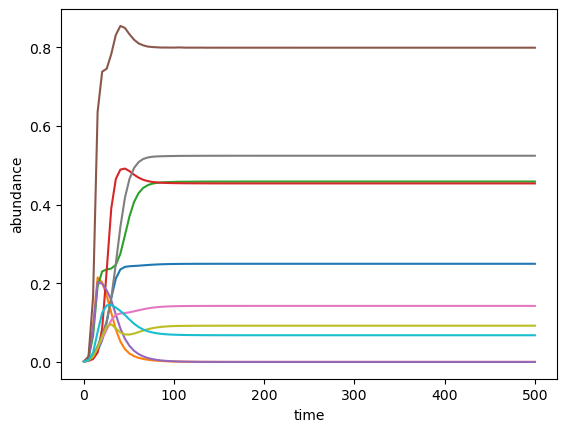

All real(eigenvalues) negative, system is stable


In [18]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_inulin.n_species)
y = runODE(t_eval, x0, gLV_model_inulin.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_inulin.params[:gLV_model_inulin.n_species]
A = np.reshape(gLV_model_inulin.params[gLV_model_inulin.n_species:], [gLV_model_inulin.n_species, gLV_model_inulin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# LAMINARINA

## Start by importing full dataset

In [19]:
dataset_laminarin = "Laminarin"
df_laminarin = pd.read_csv(f"Data_Params/{dataset_laminarin}_full_passage.csv")
print(df_laminarin.shape)
df_laminarin.head()


(425, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC_passage1.0,0.0,0.002365,0.000840,0.000829,0.001313,0.000970,0.000679,0.000812,0.000646,0.001287,0.000257
1,COMM10<AC_passage1.0,24.0,0.058233,0.031800,0.000000,0.408046,0.072025,0.012043,0.003161,0.000226,0.108663,0.053934
2,COMM10<AC_passage2.0,0.0,0.002912,0.001590,0.000000,0.020402,0.003601,0.000602,0.000158,0.000011,0.005433,0.002697
3,COMM10<AC_passage2.0,24.0,0.039814,0.013492,0.001702,0.226023,0.894296,0.000803,0.008077,0.000000,0.024601,0.034193
4,COMM10<AC_passage3.0,0.0,0.001991,0.000675,0.000085,0.011301,0.044715,0.000040,0.000404,0.000000,0.001230,0.001710


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [20]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1

Model has 110 parameters


## Run optimization to find regularized parameters

In [21]:
# instantiate gLV fit 
gLV_model_laminarin = ODE(df_laminarin, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_laminarin.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|██████████| 118/118 [00:02<00:00, 45.93it/s]


Iteration: 0, Loss: 8.540e+02, Convergence rate: inf
Iteration: 1, Loss: 8.393e+02, Convergence rate: 1.719e-02
Iteration: 2, Loss: 8.249e+02, Convergence rate: 1.715e-02
Iteration: 3, Loss: 8.108e+02, Convergence rate: 1.713e-02
Iteration: 4, Loss: 7.969e+02, Convergence rate: 1.709e-02
Iteration: 5, Loss: 7.833e+02, Convergence rate: 1.706e-02
Iteration: 6, Loss: 7.700e+02, Convergence rate: 1.703e-02
Iteration: 7, Loss: 7.569e+02, Convergence rate: 1.699e-02
Iteration: 8, Loss: 7.441e+02, Convergence rate: 1.696e-02
Iteration: 9, Loss: 7.315e+02, Convergence rate: 1.692e-02
Iteration: 10, Loss: 7.191e+02, Convergence rate: 1.688e-02
Iteration: 11, Loss: 7.070e+02, Convergence rate: 1.685e-02
Iteration: 12, Loss: 6.951e+02, Convergence rate: 1.681e-02
Iteration: 13, Loss: 6.835e+02, Convergence rate: 1.678e-02
Iteration: 14, Loss: 6.720e+02, Convergence rate: 1.673e-02
Iteration: 15, Loss: 6.608e+02, Convergence rate: 1.670e-02
Iteration: 16, Loss: 6.498e+02, Convergence rate: 1.666e

100%|██████████| 118/118 [00:04<00:00, 24.36it/s]


Total samples: 1708, Updated regularization: 3.22e-02
Iteration: 0, Loss: 7.085e+02, Convergence rate: inf
Iteration: 1, Loss: 7.011e+02, Convergence rate: 1.043e-02
Iteration: 2, Loss: 6.939e+02, Convergence rate: 1.034e-02
Iteration: 3, Loss: 6.868e+02, Convergence rate: 1.026e-02
Iteration: 4, Loss: 6.798e+02, Convergence rate: 1.014e-02
Iteration: 5, Loss: 6.730e+02, Convergence rate: 1.006e-02
Iteration: 6, Loss: 6.663e+02, Convergence rate: 9.945e-03
Step size set to 2.000e-02
Iteration: 7, Loss: 6.532e+02, Convergence rate: 1.965e-02
Iteration: 8, Loss: 6.406e+02, Convergence rate: 1.925e-02
Iteration: 9, Loss: 6.285e+02, Convergence rate: 1.887e-02
Iteration: 10, Loss: 6.169e+02, Convergence rate: 1.852e-02
Iteration: 11, Loss: 6.057e+02, Convergence rate: 1.814e-02
Iteration: 12, Loss: 5.949e+02, Convergence rate: 1.776e-02
Iteration: 13, Loss: 5.846e+02, Convergence rate: 1.738e-02
Iteration: 14, Loss: 5.746e+02, Convergence rate: 1.703e-02
Iteration: 15, Loss: 5.651e+02, Con

100%|██████████| 118/118 [00:03<00:00, 35.01it/s]


Total samples: 1708, Updated regularization: 2.38e-02
Iteration: 0, Loss: 8.115e+02, Convergence rate: inf
Iteration: 1, Loss: 8.073e+02, Convergence rate: 5.111e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 7.993e+02, Convergence rate: 9.999e-03
Step size set to 4.000e-02
Evidence 45210.672
Updating precision...


100%|██████████| 118/118 [00:06<00:00, 18.00it/s]


Total samples: 1708, Updated regularization: 2.64e-02
Iteration: 0, Loss: 8.490e+02, Convergence rate: inf
Iteration: 1, Loss: 8.449e+02, Convergence rate: 4.806e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 8.369e+02, Convergence rate: 9.410e-03
Step size set to 4.000e-02
Evidence 45654.957


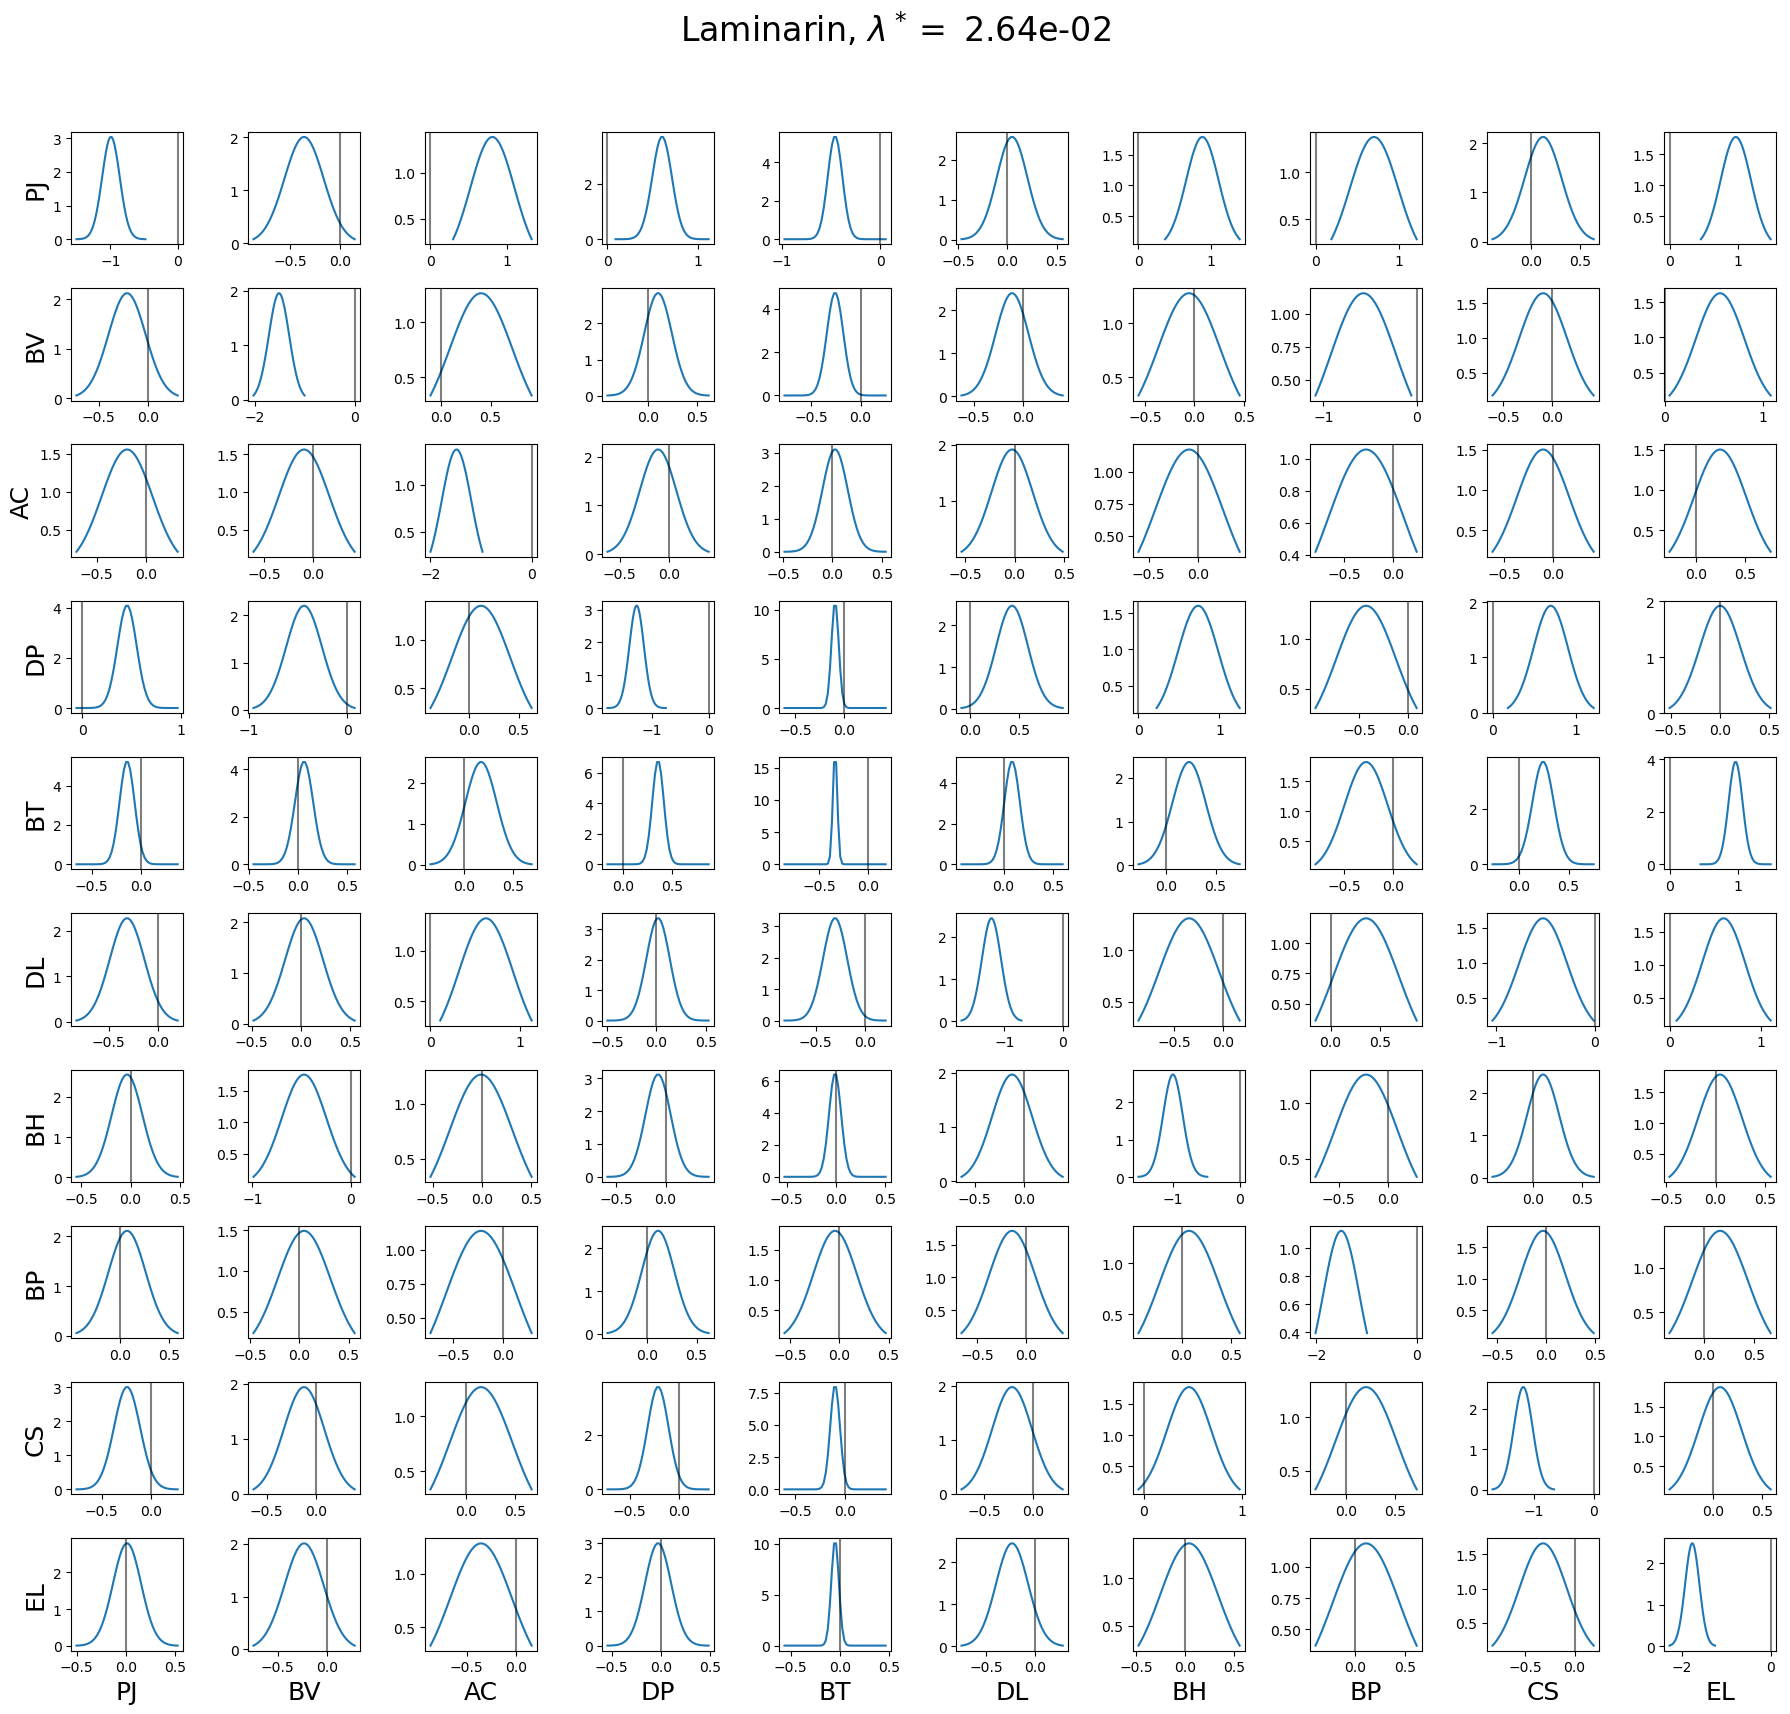

In [22]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']

Avec_laminarin = gLV_model_laminarin.params[gLV_model_laminarin.n_species:]
Aij_std_laminarin = np.sqrt(np.diag(gLV_model_laminarin.Ainv))[gLV_model_laminarin.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_laminarin.n_species):
    for j in range(gLV_model_laminarin.n_species):
        plt.subplot(gLV_model_laminarin.n_species, gLV_model_laminarin.n_species, k+1)
        a = np.linspace(Avec_laminarin[k]-np.std(Avec_laminarin), Avec_laminarin[k]+np.std(Avec_laminarin))
        plt.plot(a, norm.pdf(a,Avec_laminarin[k],Aij_std_laminarin[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_laminarin.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_laminarin.replace("_"," "), gLV_model_laminarin.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [23]:
print(f"# of parameters estimated: {len(gLV_model_laminarin.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_laminarin.params))))

log_eigs_laminarin = np.log(np.linalg.eigvalsh(gLV_model_laminarin.A))
U_laminarin = np.sum(log_eigs_laminarin)
print("Parameter precision: {:.3f}".format(U_laminarin))

# Compute Wald test for each parameter
std_errors_laminarin = np.sqrt(np.diag(gLV_model_laminarin.Ainv))
walds_laminarin = gLV_model_laminarin.params/std_errors_laminarin
wald_p_vals_laminarin = 2*norm.cdf(-np.abs(walds_laminarin))
print(sum(wald_p_vals_laminarin<.05)/len(wald_p_vals_laminarin))

# of parameters estimated: 110
Maximum absolute parameter value: 1.768
Parameter precision: 471.398
0.4090909090909091


In [24]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Laminarin = pd.DataFrame()
df_Laminarin["Param name"] = param_names
df_Laminarin["Param value"] = gLV_model_laminarin.params
df_Laminarin["Param stdv"]  = np.sqrt(np.diag(gLV_model_laminarin.Ainv))
df_Laminarin["Param p-value"] = wald_p_vals_laminarin
for j, param_name in enumerate(param_names):
    df_Laminarin[param_name]  = gLV_model_laminarin.Ainv[:, j]
#df_Laminarin.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Laminarin

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.157780,0.015311,6.680456e-25,0.000234,0.000049,-0.000030,-0.000070,0.000010,0.000008,...,0.000103,-0.000136,0.000125,-0.000006,0.000006,0.000086,-0.000007,0.000062,0.000189,0.000063
1,BV,0.256012,0.026844,1.468333e-21,0.000049,0.000721,-0.000005,0.000042,-0.000002,0.000020,...,-0.000050,0.000486,0.000022,0.000085,-0.000022,0.000030,-0.000073,-0.000036,0.000124,0.000010
2,AC,0.192577,0.028901,2.676040e-11,-0.000030,-0.000005,0.000835,0.000001,-0.000004,-0.000011,...,-0.000011,0.000100,0.000312,0.000040,-0.000016,0.000033,0.000028,0.000042,-0.000010,-0.000056
3,DP,0.280869,0.018410,1.498418e-52,-0.000070,0.000042,0.000001,0.000339,-0.000012,-0.000056,...,-0.000079,0.000119,-0.000056,0.000279,-0.000053,-0.000054,-0.000090,-0.000110,-0.000120,0.000149
4,BT,0.154190,0.006064,1.231952e-142,0.000010,-0.000002,-0.000004,-0.000012,0.000037,0.000002,...,-0.000056,0.000088,0.000112,0.000091,0.000033,0.000049,-0.000012,0.000035,0.000006,-0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,-0.234646,0.162985,1.499596e-01,0.000086,0.000030,0.000033,-0.000054,0.000049,0.000427,...,0.000757,-0.011143,-0.004331,-0.003013,0.001046,0.026564,0.002210,-0.002166,0.004566,0.000553
106,EL*BH,0.039627,0.292787,8.923387e-01,-0.000007,-0.000073,0.000028,-0.000090,-0.000012,0.000006,...,-0.003414,0.002000,-0.007410,-0.001917,-0.000412,0.002210,0.085724,-0.020606,-0.011155,0.000661
107,EL*BP,0.107633,0.335644,7.484564e-01,0.000062,-0.000036,0.000042,-0.000110,0.000035,0.000032,...,-0.005555,-0.001060,-0.002293,-0.000518,0.001752,-0.002166,-0.020606,0.112657,-0.004986,0.001708
108,EL*CS,-0.319832,0.240625,1.837905e-01,0.000189,0.000124,-0.000010,-0.000120,0.000006,0.000099,...,-0.001327,-0.006503,0.001156,-0.011851,-0.000185,0.004566,-0.011155,-0.004986,0.057900,0.003722


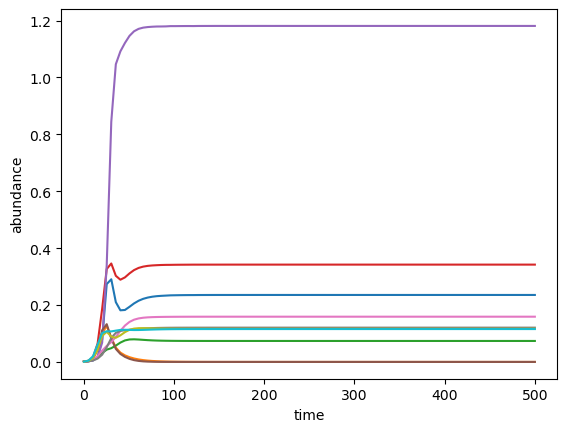

All real(eigenvalues) negative, system is stable


In [25]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_laminarin.n_species)
y = runODE(t_eval, x0, gLV_model_laminarin.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_laminarin.params[:gLV_model_laminarin.n_species]
A = np.reshape(gLV_model_laminarin.params[gLV_model_laminarin.n_species:], [gLV_model_laminarin.n_species, gLV_model_laminarin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# XYLANO

## Start by importing full dataset

In [26]:
dataset_xylan= "Xylan"
df_xylan = pd.read_csv(f"Data_Params/{dataset_xylan}_full_passage.csv")
print(df_xylan.shape)
df_xylan.head()


(428, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC_passage1.0,0.0,0.002365,0.000840,0.000829,0.001313,0.000970,0.000679,0.000812,0.000646,0.001287,0.000257
1,COMM10<AC_passage1.0,24.0,0.014662,0.101607,0.000760,0.384594,0.277335,0.056530,0.001876,0.002736,0.089326,0.197074
2,COMM10<AC_passage2.0,0.0,0.000733,0.005080,0.000038,0.019230,0.013867,0.002826,0.000094,0.000137,0.004466,0.009854
3,COMM10<AC_passage2.0,24.0,0.011976,0.211938,0.000000,0.465521,0.168343,0.004875,0.003701,0.000000,0.023428,0.174718
4,COMM10<AC_passage3.0,0.0,0.000599,0.010597,0.000000,0.023276,0.008417,0.000244,0.000185,0.000000,0.001171,0.008736


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [27]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1

Model has 110 parameters


## Run optimization to find regularized parameters

In [28]:
# instantiate gLV fit 
gLV_model_xylan = ODE(df_xylan, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_xylan.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|██████████| 113/113 [00:00<00:00, 115.92it/s]


Iteration: 0, Loss: 8.349e+02, Convergence rate: inf
Iteration: 1, Loss: 8.210e+02, Convergence rate: 1.664e-02
Iteration: 2, Loss: 8.074e+02, Convergence rate: 1.656e-02
Iteration: 3, Loss: 7.941e+02, Convergence rate: 1.651e-02
Iteration: 4, Loss: 7.810e+02, Convergence rate: 1.648e-02
Iteration: 5, Loss: 7.682e+02, Convergence rate: 1.641e-02
Iteration: 6, Loss: 7.556e+02, Convergence rate: 1.637e-02
Iteration: 7, Loss: 7.433e+02, Convergence rate: 1.632e-02
Iteration: 8, Loss: 7.312e+02, Convergence rate: 1.626e-02
Iteration: 9, Loss: 7.194e+02, Convergence rate: 1.621e-02
Iteration: 10, Loss: 7.077e+02, Convergence rate: 1.615e-02
Iteration: 11, Loss: 6.963e+02, Convergence rate: 1.610e-02
Iteration: 12, Loss: 6.852e+02, Convergence rate: 1.604e-02
Iteration: 13, Loss: 6.742e+02, Convergence rate: 1.599e-02
Iteration: 14, Loss: 6.635e+02, Convergence rate: 1.593e-02
Iteration: 15, Loss: 6.529e+02, Convergence rate: 1.587e-02
Iteration: 16, Loss: 6.426e+02, Convergence rate: 1.581e

100%|██████████| 113/113 [00:03<00:00, 30.12it/s]


Total samples: 1670, Updated regularization: 1.64e-02
Iteration: 0, Loss: 6.927e+02, Convergence rate: inf
Iteration: 1, Loss: 6.884e+02, Convergence rate: 6.274e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 6.799e+02, Convergence rate: 1.228e-02
Iteration: 3, Loss: 6.718e+02, Convergence rate: 1.192e-02
Iteration: 4, Loss: 6.640e+02, Convergence rate: 1.159e-02
Iteration: 5, Loss: 6.566e+02, Convergence rate: 1.126e-02
Iteration: 6, Loss: 6.494e+02, Convergence rate: 1.090e-02
Iteration: 7, Loss: 6.425e+02, Convergence rate: 1.058e-02
Iteration: 8, Loss: 6.359e+02, Convergence rate: 1.027e-02
Iteration: 9, Loss: 6.296e+02, Convergence rate: 9.951e-03
Step size set to 4.000e-02
Evidence 45295.464
Updating precision...


100%|██████████| 113/113 [00:03<00:00, 32.93it/s]


Total samples: 1670, Updated regularization: 2.17e-02
Iteration: 0, Loss: 8.145e+02, Convergence rate: inf
Iteration: 1, Loss: 8.108e+02, Convergence rate: 4.590e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 8.035e+02, Convergence rate: 8.978e-03
Step size set to 4.000e-02
Evidence 47195.515
Updating precision...


100%|██████████| 113/113 [00:03<00:00, 32.82it/s]


Total samples: 1670, Updated regularization: 2.31e-02
Iteration: 0, Loss: 8.319e+02, Convergence rate: inf
Iteration: 1, Loss: 8.284e+02, Convergence rate: 4.305e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 8.214e+02, Convergence rate: 8.449e-03
Step size set to 4.000e-02
Evidence 47446.593


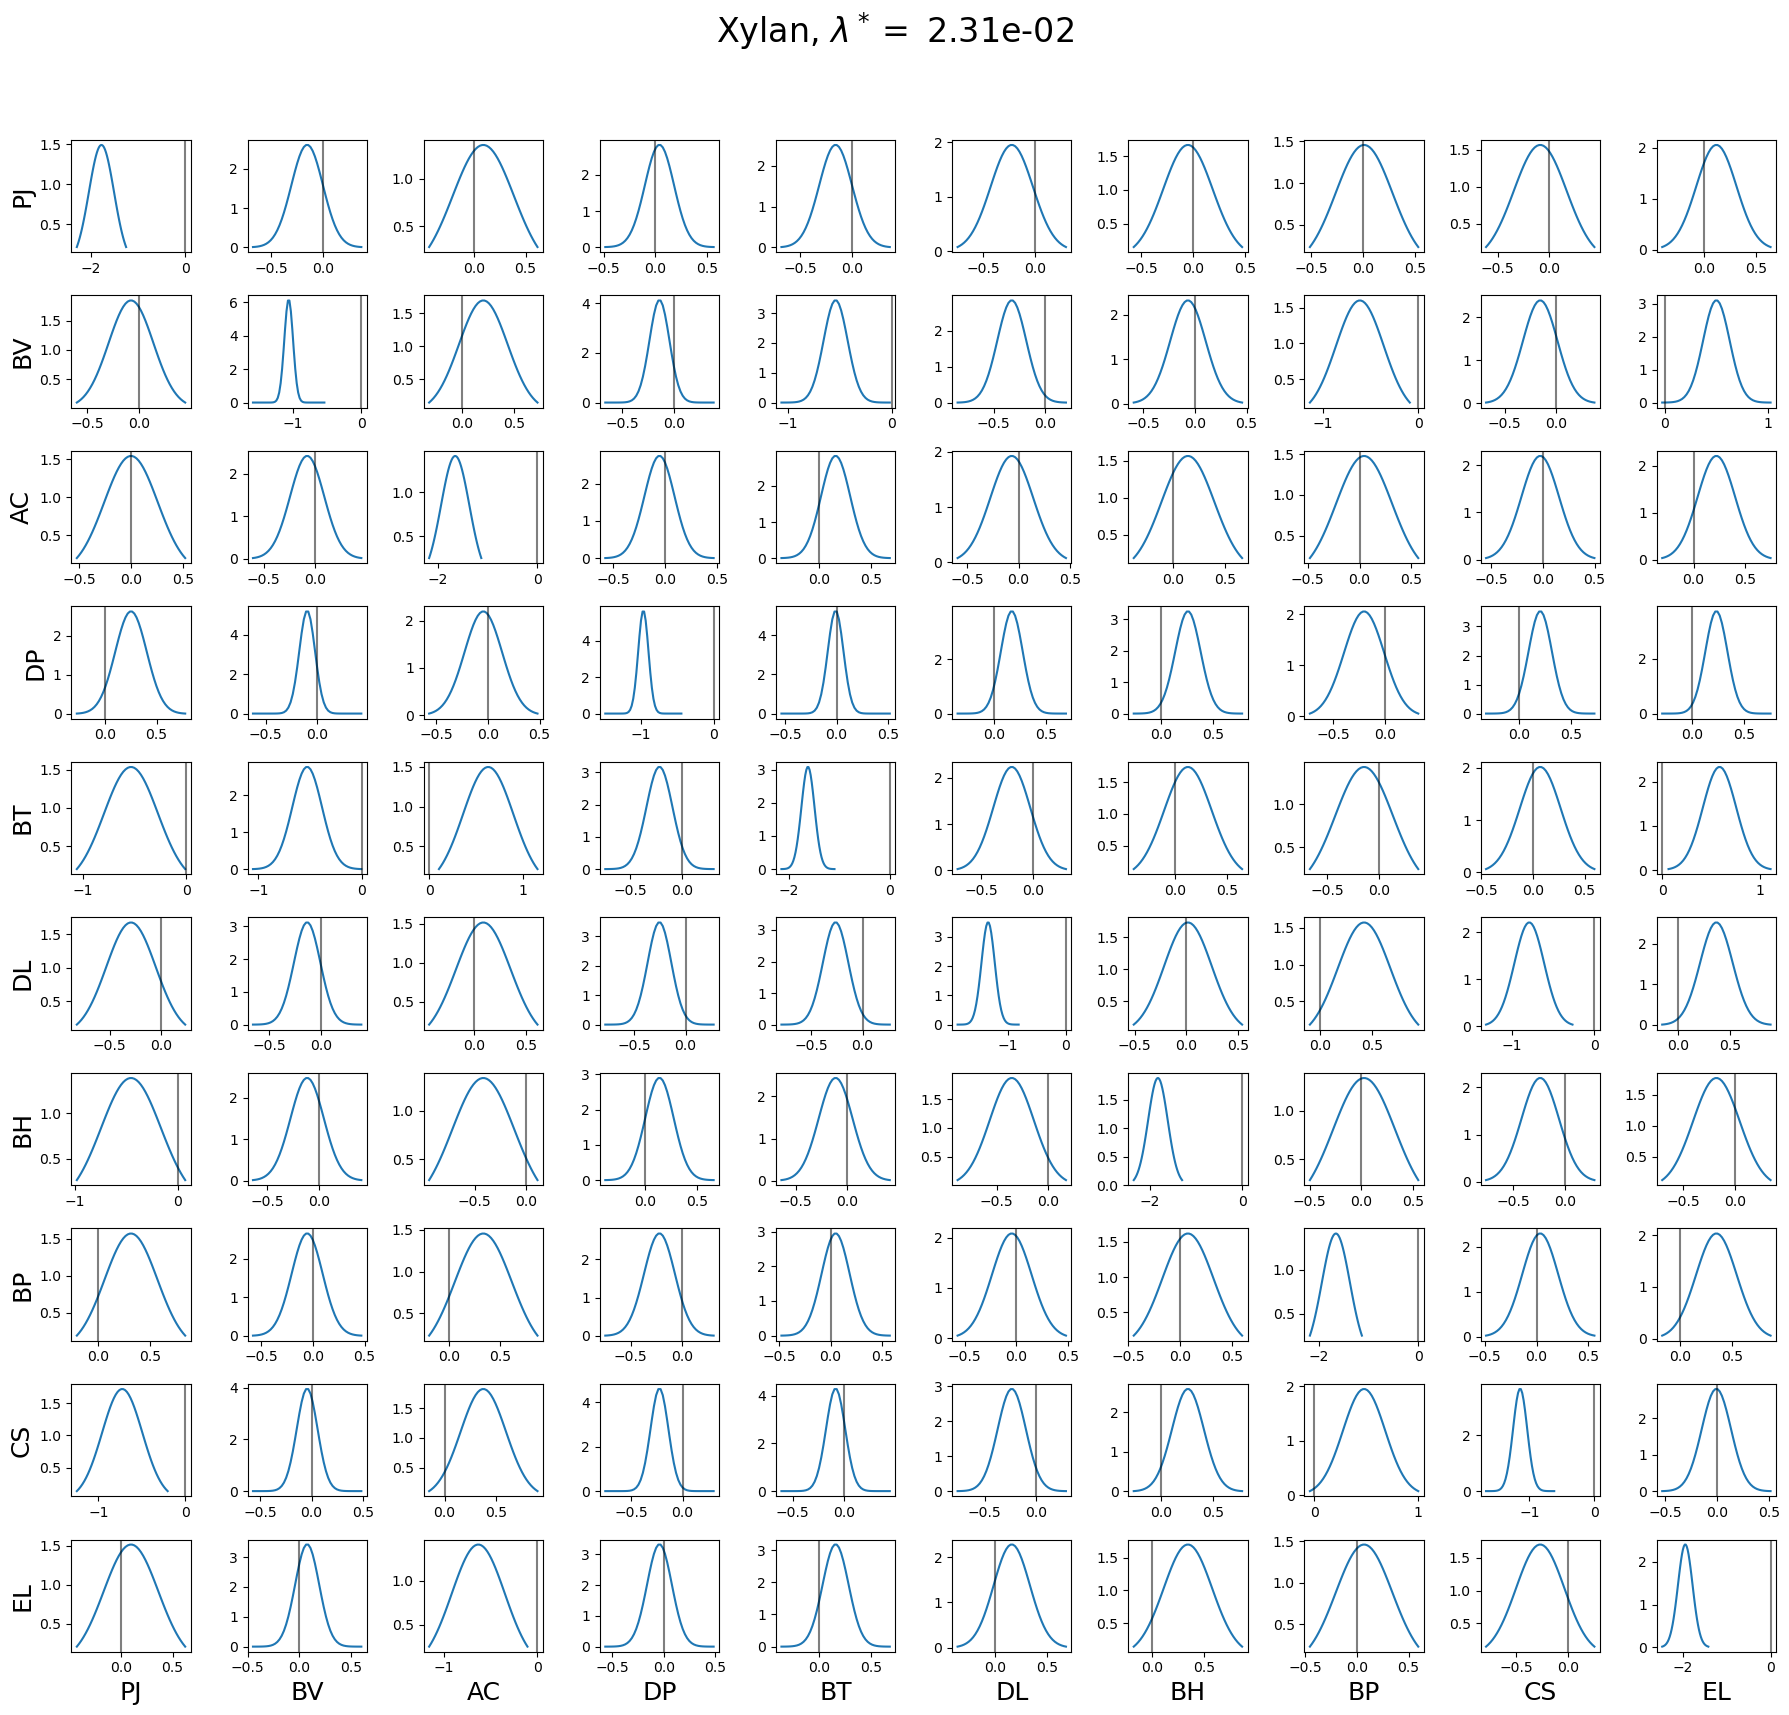

In [29]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']

Avec_xylan = gLV_model_xylan.params[gLV_model_xylan.n_species:]
Aij_std_xylan = np.sqrt(np.diag(gLV_model_xylan.Ainv))[gLV_model_xylan.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_xylan.n_species):
    for j in range(gLV_model_xylan.n_species):
        plt.subplot(gLV_model_xylan.n_species, gLV_model_xylan.n_species, k+1)
        a = np.linspace(Avec_xylan[k]-np.std(Avec_xylan), Avec_xylan[k]+np.std(Avec_xylan))
        plt.plot(a, norm.pdf(a,Avec_xylan[k],Aij_std_xylan[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_xylan.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_xylan.replace("_"," "), gLV_model_xylan.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [30]:
print(f"# of parameters estimated: {len(gLV_model_xylan.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_xylan.params))))

log_eigs_xylan = np.log(np.linalg.eigvalsh(gLV_model_xylan.A))
U_xylan = np.sum(log_eigs_xylan)
print("Parameter precision: {:.3f}".format(U_xylan))

# Compute Wald test for each parameter
std_errors_xylan = np.sqrt(np.diag(gLV_model_xylan.Ainv))
walds_xylan = gLV_model_xylan.params/std_errors_xylan
wald_p_vals_xylan = 2*norm.cdf(-np.abs(walds_xylan))
print(sum(wald_p_vals_xylan<.05)/len(wald_p_vals_xylan))

# of parameters estimated: 110
Maximum absolute parameter value: 1.938
Parameter precision: 472.725
0.34545454545454546


In [31]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Xylan = pd.DataFrame()
df_Xylan["Param name"] = param_names
df_Xylan["Param value"] = gLV_model_xylan.params
df_Xylan["Param stdv"]  = np.sqrt(np.diag(gLV_model_xylan.Ainv))
df_Xylan["Param p-value"] = wald_p_vals_xylan
for j, param_name in enumerate(param_names):
    df_Xylan[param_name]  = gLV_model_xylan.Ainv[:, j]
#df_Xylan.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Xylan

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.258567,0.028671,1.905922e-19,8.220012e-04,0.000002,-9.498574e-08,-1.984464e-05,0.000038,1.675809e-05,...,-0.000047,-0.000004,-0.000011,-0.000010,2.185571e-05,0.000002,-0.000010,-0.000048,0.000008,0.000031
1,BV,0.360379,0.017241,5.040484e-97,2.427618e-06,0.000297,-4.295360e-06,1.063166e-05,0.000075,2.185511e-05,...,0.000025,0.000024,0.000018,-0.000008,3.621995e-05,-0.000027,0.000032,0.000009,-0.000003,0.000122
2,AC,0.191434,0.027407,2.849201e-12,-9.498574e-08,-0.000004,7.511224e-04,5.121158e-07,-0.000017,5.837679e-07,...,0.000061,0.000004,0.000408,-0.000034,8.112465e-07,0.000047,0.000008,0.000117,0.000062,0.000015
3,DP,0.263483,0.014695,6.840511e-72,-1.984464e-05,0.000011,5.121158e-07,2.159385e-04,0.000008,-5.466439e-06,...,0.000039,-0.000008,0.000003,0.000018,4.405367e-05,0.000026,0.000034,0.000025,-0.000010,0.000034
4,BT,0.417870,0.022258,1.231700e-78,3.786332e-05,0.000075,-1.721964e-05,7.519192e-06,0.000495,3.029763e-05,...,0.000004,-0.000017,0.000042,-0.000060,9.072096e-05,0.000024,0.000046,0.000021,0.000051,0.000214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,0.161464,0.174888,3.558798e-01,2.383621e-06,-0.000027,4.742158e-05,2.580132e-05,0.000024,8.223248e-05,...,-0.002254,-0.000023,-0.005614,-0.000718,-2.525034e-03,0.030586,0.006007,-0.008581,-0.001912,-0.002444
106,EL*BH,0.344052,0.234180,1.417836e-01,-1.021128e-05,0.000032,7.730960e-06,3.428820e-05,0.000046,3.962117e-05,...,-0.001151,-0.003097,0.001675,-0.006992,-1.804076e-03,0.006007,0.054840,-0.001811,-0.000971,0.004292
107,EL*BP,0.070471,0.272619,7.960234e-01,-4.792073e-05,0.000009,1.170307e-04,2.529472e-05,0.000021,-1.505950e-05,...,-0.017252,0.002032,-0.012517,0.001100,5.796531e-03,-0.008581,-0.001811,0.074321,-0.014272,-0.001842
108,EL*CS,-0.268866,0.233806,2.501625e-01,7.999334e-06,-0.000003,6.186995e-05,-9.622944e-06,0.000051,2.630680e-05,...,-0.004069,0.000912,-0.005068,-0.008090,-1.428021e-03,-0.001912,-0.000971,-0.014272,0.054665,0.000173


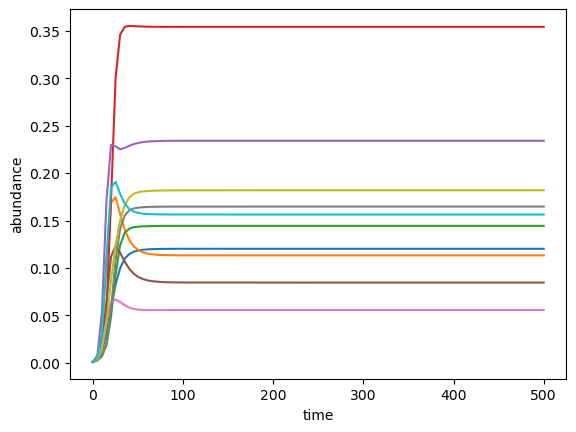

All real(eigenvalues) negative, system is stable


In [32]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_xylan.n_species)
y = runODE(t_eval, x0, gLV_model_xylan.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_xylan.params[:gLV_model_xylan.n_species]
A = np.reshape(gLV_model_xylan.params[gLV_model_xylan.n_species:], [gLV_model_xylan.n_species, gLV_model_laminarin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# NO CARBON

## Start by importing full dataset

In [33]:
dataset_nocarb= "No carb"
df_nocarb = pd.read_csv(f"Data_Params/{dataset_nocarb}_full_passage.csv")
print(df_nocarb.shape)
df_nocarb.head()


(365, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC_passage1.0,0.0,0.002365,0.000840,0.000829,0.001313,0.000970,0.000679,0.000812,0.000646,0.001287,0.000257
1,COMM10<AC_passage1.0,24.0,0.004935,0.006957,0.000000,0.428863,0.027779,0.005639,0.002007,0.000148,0.039838,0.041667
2,COMM10<AC_passage2.0,0.0,0.000247,0.000348,0.000000,0.021443,0.001389,0.000282,0.000100,0.000007,0.001992,0.002083
3,COMM10<AC_passage2.0,24.0,0.002554,0.003267,0.000000,0.500280,0.005427,0.000776,0.006662,0.000000,0.012239,0.072962
4,COMM10<AC_passage3.0,0.0,0.000128,0.000163,0.000000,0.025014,0.000271,0.000039,0.000333,0.000000,0.000612,0.003648


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [34]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1

Model has 110 parameters


## Run optimization to find regularized parameters

In [35]:
# instantiate gLV fit 
gLV_model_nocarb = ODE(df_nocarb, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_nocarb.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|██████████| 101/101 [00:00<00:00, 111.51it/s]


Iteration: 0, Loss: 6.409e+02, Convergence rate: inf
Iteration: 1, Loss: 6.292e+02, Convergence rate: 1.839e-02
Iteration: 2, Loss: 6.176e+02, Convergence rate: 1.834e-02
Iteration: 3, Loss: 6.063e+02, Convergence rate: 1.832e-02
Iteration: 4, Loss: 5.952e+02, Convergence rate: 1.829e-02
Iteration: 5, Loss: 5.843e+02, Convergence rate: 1.827e-02
Iteration: 6, Loss: 5.737e+02, Convergence rate: 1.824e-02
Iteration: 7, Loss: 5.632e+02, Convergence rate: 1.820e-02
Iteration: 8, Loss: 5.530e+02, Convergence rate: 1.818e-02
Iteration: 9, Loss: 5.430e+02, Convergence rate: 1.813e-02
Iteration: 10, Loss: 5.331e+02, Convergence rate: 1.812e-02
Iteration: 11, Loss: 5.235e+02, Convergence rate: 1.808e-02
Iteration: 12, Loss: 5.141e+02, Convergence rate: 1.805e-02
Iteration: 13, Loss: 5.048e+02, Convergence rate: 1.802e-02
Iteration: 14, Loss: 4.957e+02, Convergence rate: 1.797e-02
Iteration: 15, Loss: 4.868e+02, Convergence rate: 1.794e-02
Iteration: 16, Loss: 4.781e+02, Convergence rate: 1.791e

100%|██████████| 101/101 [00:02<00:00, 47.51it/s]


Total samples: 1282, Updated regularization: 1.40e-02
Iteration: 0, Loss: 4.932e+02, Convergence rate: inf
Iteration: 1, Loss: 4.872e+02, Convergence rate: 1.211e-02
Iteration: 2, Loss: 4.813e+02, Convergence rate: 1.201e-02
Iteration: 3, Loss: 4.756e+02, Convergence rate: 1.192e-02
Iteration: 4, Loss: 4.700e+02, Convergence rate: 1.180e-02
Iteration: 5, Loss: 4.645e+02, Convergence rate: 1.172e-02
Iteration: 6, Loss: 4.591e+02, Convergence rate: 1.161e-02
Iteration: 7, Loss: 4.538e+02, Convergence rate: 1.150e-02
Iteration: 8, Loss: 4.486e+02, Convergence rate: 1.141e-02
Iteration: 9, Loss: 4.436e+02, Convergence rate: 1.128e-02
Iteration: 10, Loss: 4.386e+02, Convergence rate: 1.122e-02
Iteration: 11, Loss: 4.337e+02, Convergence rate: 1.108e-02
Iteration: 12, Loss: 4.290e+02, Convergence rate: 1.097e-02
Iteration: 13, Loss: 4.243e+02, Convergence rate: 1.089e-02
Iteration: 14, Loss: 4.197e+02, Convergence rate: 1.077e-02
Iteration: 15, Loss: 4.152e+02, Convergence rate: 1.070e-02
It

100%|██████████| 101/101 [00:02<00:00, 44.22it/s]


Total samples: 1282, Updated regularization: 7.21e-03
Iteration: 0, Loss: 5.896e+02, Convergence rate: inf
Iteration: 1, Loss: 5.861e+02, Convergence rate: 5.971e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 5.793e+02, Convergence rate: 1.162e-02
Iteration: 3, Loss: 5.728e+02, Convergence rate: 1.126e-02
Iteration: 4, Loss: 5.666e+02, Convergence rate: 1.084e-02
Iteration: 5, Loss: 5.606e+02, Convergence rate: 1.052e-02
Iteration: 6, Loss: 5.549e+02, Convergence rate: 1.017e-02
Iteration: 7, Loss: 5.495e+02, Convergence rate: 9.799e-03
Step size set to 4.000e-02
Evidence 39562.135
Updating precision...


100%|██████████| 101/101 [00:04<00:00, 23.90it/s]


Total samples: 1282, Updated regularization: 6.78e-03
Iteration: 0, Loss: 6.330e+02, Convergence rate: inf
Iteration: 1, Loss: 6.299e+02, Convergence rate: 4.893e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 6.239e+02, Convergence rate: 9.484e-03
Step size set to 4.000e-02
Evidence 40416.602
Updating precision...


100%|██████████| 101/101 [00:04<00:00, 22.43it/s]


Total samples: 1282, Updated regularization: 6.68e-03
Iteration: 0, Loss: 6.392e+02, Convergence rate: inf
Iteration: 1, Loss: 6.362e+02, Convergence rate: 4.662e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 6.305e+02, Convergence rate: 9.083e-03
Step size set to 4.000e-02
Evidence 40571.453


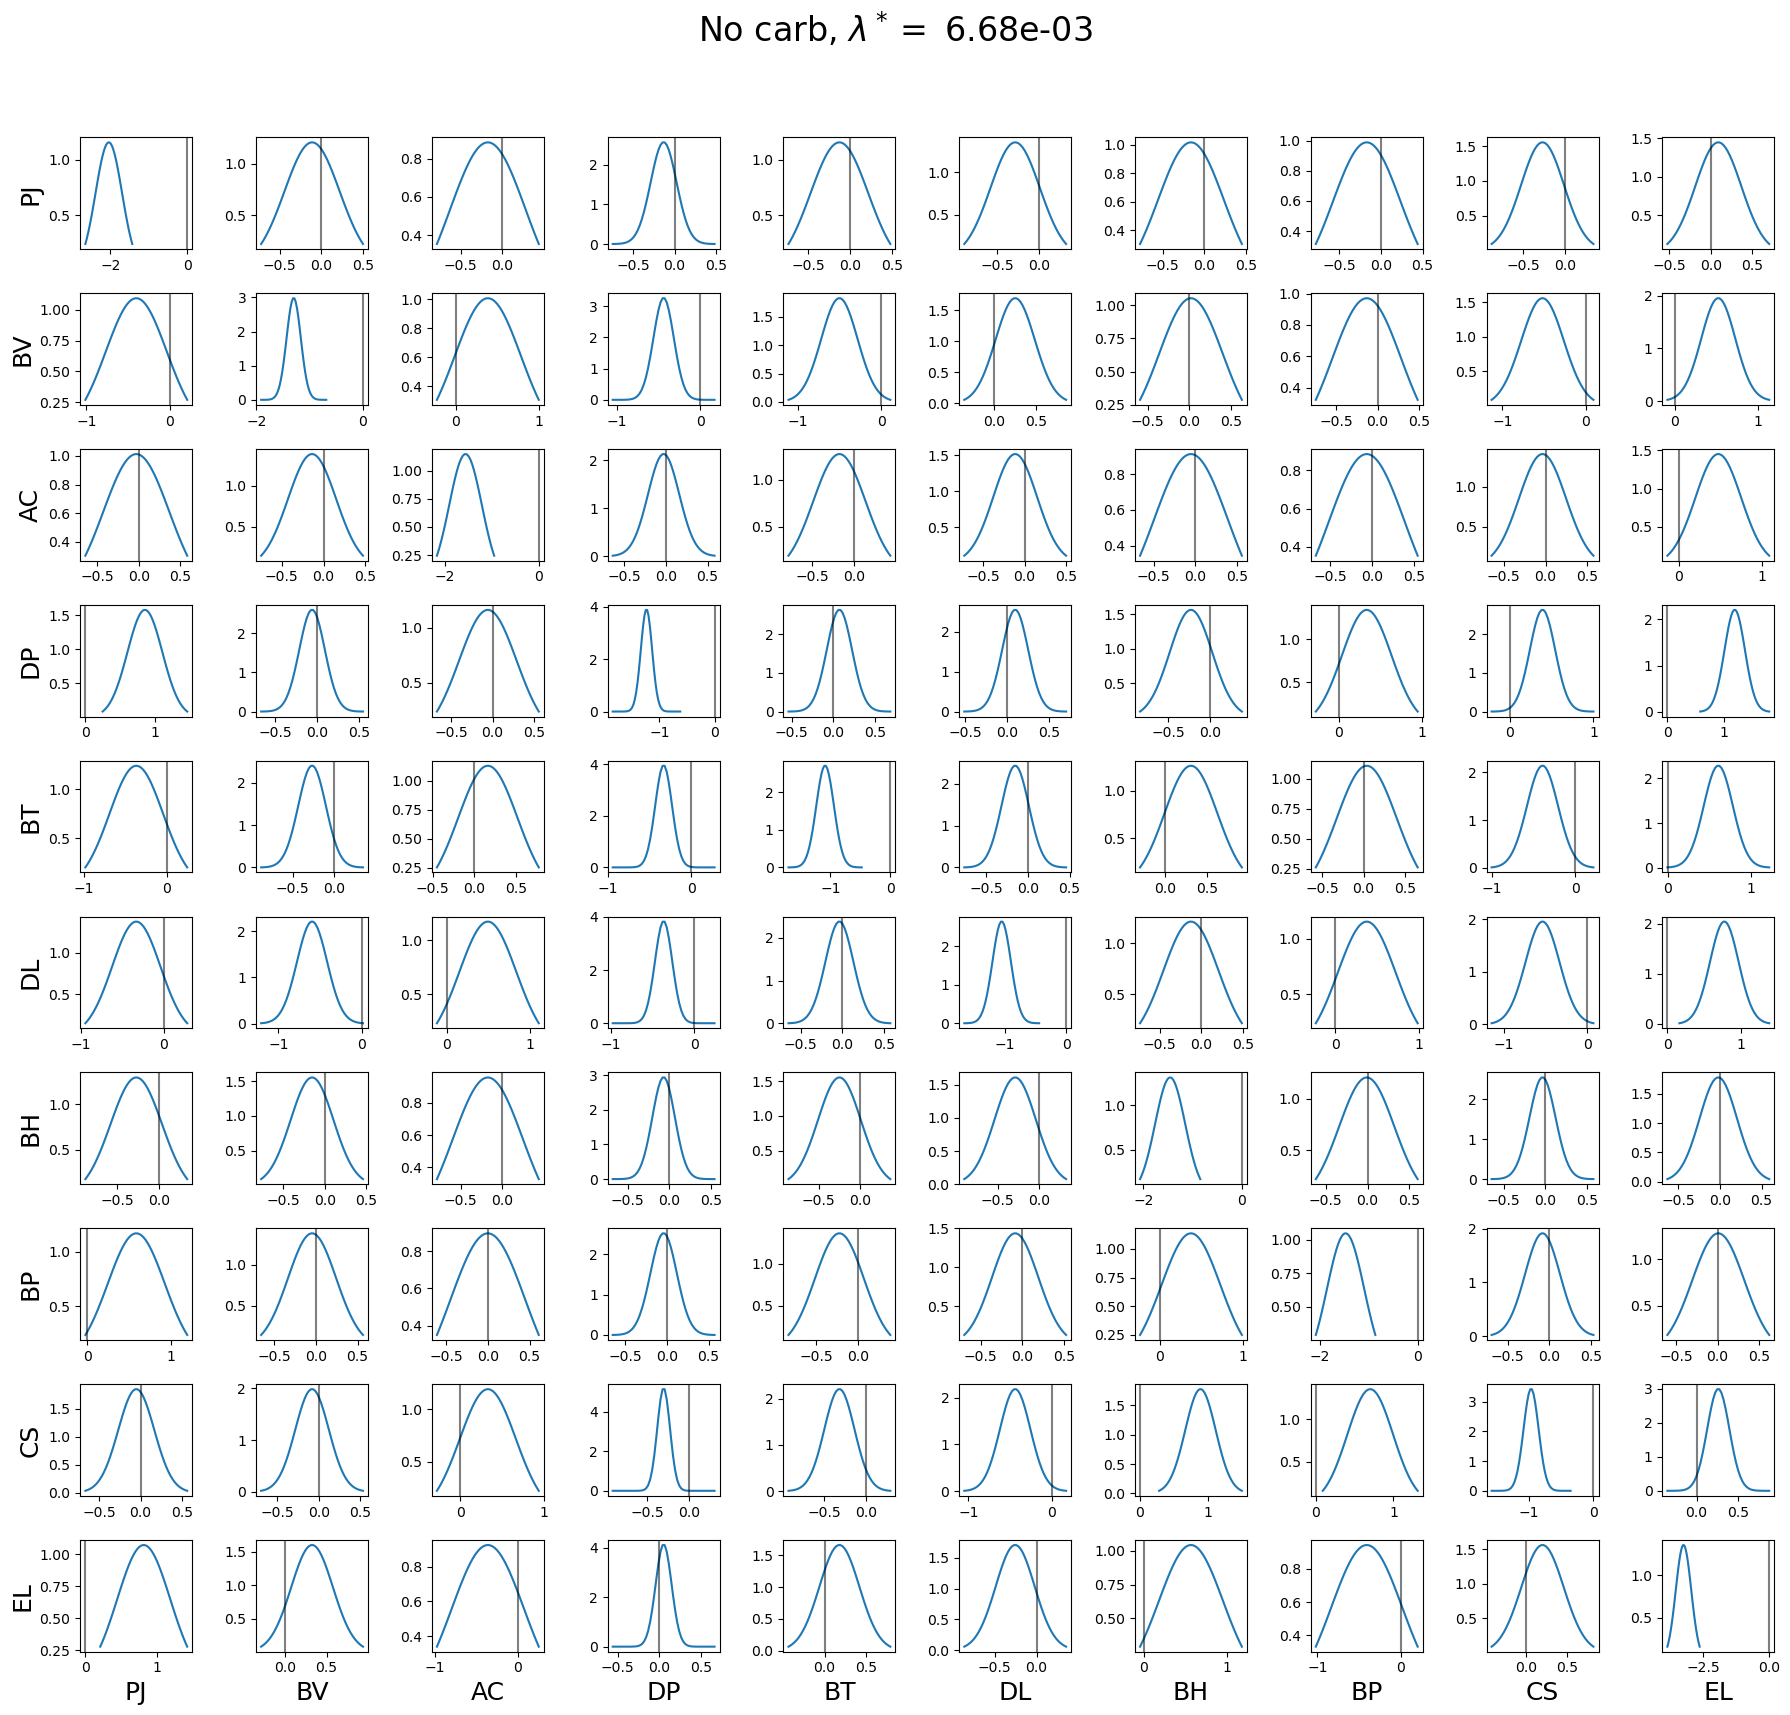

In [36]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']

Avec_nocarb = gLV_model_nocarb.params[gLV_model_nocarb.n_species:]
Aij_std_nocarb = np.sqrt(np.diag(gLV_model_nocarb.Ainv))[gLV_model_nocarb.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_nocarb.n_species):
    for j in range(gLV_model_nocarb.n_species):
        plt.subplot(gLV_model_nocarb.n_species, gLV_model_nocarb.n_species, k+1)
        a = np.linspace(Avec_nocarb[k]-np.std(Avec_nocarb), Avec_nocarb[k]+np.std(Avec_nocarb))
        plt.plot(a, norm.pdf(a,Avec_nocarb[k],Aij_std_nocarb[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_nocarb.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_nocarb.replace("_"," "), gLV_model_nocarb.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [37]:
print(f"# of parameters estimated: {len(gLV_model_nocarb.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_nocarb.params))))

log_eigs_nocarb = np.log(np.linalg.eigvalsh(gLV_model_nocarb.A))
U_nocarb = np.sum(log_eigs_nocarb)
print("Parameter precision: {:.3f}".format(U_nocarb))

# Compute Wald test for each parameter
std_errors_nocarb = np.sqrt(np.diag(gLV_model_nocarb.Ainv))
walds_nocarb = gLV_model_nocarb.params/std_errors_nocarb
wald_p_vals_nocarb = 2*norm.cdf(-np.abs(walds_nocarb))
print(sum(wald_p_vals_nocarb<.05)/len(wald_p_vals_nocarb))

# of parameters estimated: 110
Maximum absolute parameter value: 3.243
Parameter precision: 402.676
0.35454545454545455


In [38]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Nocarb = pd.DataFrame()
df_Nocarb["Param name"] = param_names
df_Nocarb["Param value"] = gLV_model_nocarb.params
df_Nocarb["Param stdv"]  = np.sqrt(np.diag(gLV_model_nocarb.Ainv))
df_Nocarb["Param p-value"] = wald_p_vals_nocarb
for j, param_name in enumerate(param_names):
    df_Nocarb[param_name]  = gLV_model_nocarb.Ainv[:, j]
#df_Nocarb.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Nocarb

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.237312,0.028776,1.627666e-16,0.000828,2.056843e-05,1.780455e-06,-0.000084,1.684928e-05,1.892439e-05,...,0.000285,-0.000095,0.000085,-0.000028,0.000084,0.000077,-0.000005,-7.232282e-05,-0.000110,0.001054
1,BV,0.261998,0.021875,4.681566e-33,0.000021,4.785088e-04,8.199143e-07,0.000012,1.555399e-05,9.812801e-06,...,-0.000110,0.000058,0.000001,-0.000004,-0.000005,-0.000038,-0.000028,-3.563102e-06,0.000010,0.000223
2,AC,0.148653,0.024445,1.192775e-09,0.000002,8.199143e-07,5.975370e-04,-0.000001,1.312369e-06,-6.997098e-07,...,0.000004,0.000002,0.000057,0.000005,0.000019,0.000027,0.000022,7.206548e-07,0.000018,0.000003
3,DP,0.262067,0.016473,5.488417e-57,-0.000084,1.156694e-05,-1.187118e-06,0.000271,1.400476e-06,3.489570e-06,...,0.000203,0.000019,0.000105,0.000186,0.000129,0.000096,-0.000052,-3.237131e-05,0.000100,0.001060
4,BT,0.227629,0.018873,1.698224e-33,0.000017,1.555399e-05,1.312369e-06,0.000001,3.562000e-04,3.618555e-06,...,-0.000065,-0.000057,0.000029,-0.000015,0.000305,-0.000020,0.000011,5.603129e-07,0.000008,0.000167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,-0.255903,0.233509,2.731218e-01,0.000077,-3.778723e-05,2.741290e-05,0.000096,-2.046972e-05,4.868244e-04,...,-0.004709,-0.005347,-0.006843,0.001559,-0.007878,0.054527,-0.002767,-1.529635e-02,-0.000494,-0.007947
106,EL*BH,0.566597,0.382917,1.389572e-01,-0.000005,-2.824484e-05,2.173302e-05,-0.000052,1.109046e-05,6.122583e-05,...,-0.001368,-0.004732,-0.001114,-0.001960,-0.008832,-0.002767,0.146626,-1.900899e-02,-0.013512,0.005747
107,EL*BP,-0.408895,0.423872,3.347121e-01,-0.000072,-3.563102e-06,7.206548e-07,-0.000032,5.603129e-07,1.279052e-06,...,-0.009630,-0.008516,-0.005039,-0.000868,-0.008305,-0.015296,-0.019009,1.796676e-01,0.003551,0.004443
108,EL*CS,0.201135,0.254810,4.299057e-01,-0.000110,9.505209e-06,1.782502e-05,0.000100,7.774851e-06,2.528572e-07,...,-0.018104,0.005341,0.001289,-0.000428,0.000859,-0.000494,-0.013512,3.550695e-03,0.064928,-0.011427


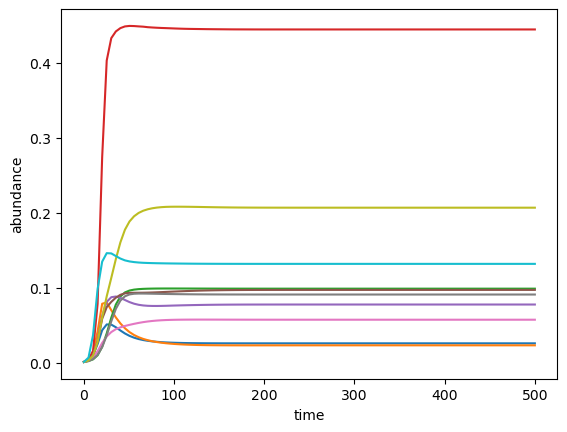

All real(eigenvalues) negative, system is stable


In [39]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_nocarb.n_species)
y = runODE(t_eval, x0, gLV_model_nocarb.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_nocarb.params[:gLV_model_nocarb.n_species]
A = np.reshape(gLV_model_nocarb.params[gLV_model_nocarb.n_species:], [gLV_model_nocarb.n_species, gLV_model_laminarin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# All params

In [40]:
df_params = pd.DataFrame({
    'Param name': df_Nocarb['Param name'],
    'Param value_Nocarb': df_Nocarb['Param value'],
    'Param value_Inulin': df_Inulin['Param value'],
    'Param value_Laminarin': df_Laminarin['Param value'],
    'Param value_Xylan': df_Xylan['Param value']
})
df_params

,Param name,Param value_Nocarb,Param value_Inulin,Param value_Laminarin,Param value_Xylan
0,PJ,0.237312,0.253887,0.157780,0.258567
1,BV,0.261998,0.482203,0.256012,0.360379
2,AC,0.148653,0.437547,0.192577,0.191434
3,DP,0.262067,0.190892,0.280869,0.263483
4,BT,0.227629,0.466031,0.154190,0.417870
...,...,...,...,...,...
105,EL*DL,-0.255903,-0.131300,-0.234646,0.161464
106,EL*BH,0.566597,-0.022501,0.039627,0.344052
107,EL*BP,-0.408895,0.134036,0.107633,0.070471
108,EL*CS,0.201135,-0.059665,-0.319832,-0.268866


In [41]:
# Calculate median for each row
df_params['Median'] = df_params[['Param value_Nocarb', 'Param value_Inulin', 
                            'Param value_Laminarin', 'Param value_Xylan']].median(axis=1)

# Calculate standard deviation for each row
df_params['Std_dev'] = df_params[['Param value_Nocarb', 'Param value_Inulin', 
                            'Param value_Laminarin', 'Param value_Xylan']].std(axis=1)

df_params

,Param name,Param value_Nocarb,Param value_Inulin,Param value_Laminarin,Param value_Xylan,Median,Std_dev
0,PJ,0.237312,0.253887,0.157780,0.258567,0.245599,0.046965
1,BV,0.261998,0.482203,0.256012,0.360379,0.311189,0.106106
2,AC,0.148653,0.437547,0.192577,0.191434,0.192006,0.131594
3,DP,0.262067,0.190892,0.280869,0.263483,0.262775,0.039884
4,BT,0.227629,0.466031,0.154190,0.417870,0.322749,0.149307
...,...,...,...,...,...,...,...
105,EL*DL,-0.255903,-0.131300,-0.234646,0.161464,-0.182973,0.192238
106,EL*BH,0.566597,-0.022501,0.039627,0.344052,0.191840,0.274644
107,EL*BP,-0.408895,0.134036,0.107633,0.070471,0.089052,0.257793
108,EL*CS,0.201135,-0.059665,-0.319832,-0.268866,-0.164266,0.237061


In [42]:
from scipy import stats
# Sample data for each condition (replace with your actual model parameter arrays)
Avec_inulin = df_params['Param value_Inulin'].values
Avec_laminarin = df_params['Param value_Laminarin'].values
Avec_xylan = df_params['Param value_Xylan'].values
Avec_nocarb = df_params['Param value_Nocarb'].values

# 1. Z-Test (for two conditions, inulin vs laminarin as an example)
mean_inulin = np.mean(Avec_inulin)
mean_laminarin = np.mean(Avec_laminarin)
std_inulin = np.std(Avec_inulin)
std_laminarin = np.std(Avec_laminarin)
n_inulin = len(Avec_inulin)
n_laminarin = len(Avec_laminarin)

z_score = (mean_inulin - mean_laminarin) / np.sqrt((std_inulin**2 / n_inulin) + (std_laminarin**2 / n_laminarin))
print("Z-Score:", z_score)

# 2. T-Test (inulin vs laminarin)
t_stat, p_value = stats.ttest_ind(Avec_inulin, Avec_laminarin)
print(f"T-Test: t-statistic={t_stat}, p-value={p_value}")

# 3. ANOVA (inulin, laminarin, xylan, no carb)
f_stat, p_value_anova = stats.f_oneway(Avec_inulin, Avec_laminarin, Avec_xylan, Avec_nocarb)
print(f"ANOVA: F-statistic={f_stat}, p-value={p_value_anova}")


Z-Score: -0.23412830589832115
T-Test: t-statistic=-0.23306165658834, p-value=0.8159322093348097
ANOVA: F-statistic=0.5862492502830188, p-value=0.6242882269612906
